In [148]:
%matplotlib inline
import numpy as np
from ggplot import *
import pandas as pd
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error
from nltk.stem.porter import PorterStemmer

import nltk
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [149]:
def detect_lang(comment):
    
    language = "No found"
    try:
        language = detect(comment)
    except:
        print "could not find language"
    return language

In [150]:
def add_language_to_reviews(df):
    df_reviews = pd.read_csv('data/reviews.csv')
    
    df_reviews["comments2"] = df_reviews.comments.apply(lambda x:str(x).decode('utf-8'))
    df_reviews['language']= df_reviews.comments2.apply(detect_lang)
    df_reviews.to_csv("data/reviews_with_lang.csv")
    

In [151]:
df_reviews = pd.read_csv('data/reviews_with_lang.csv')
df_reviews_eng = df_reviews[df_reviews.language=='en']

df_listing = pd.read_csv('data/listings.csv')


In [152]:
df_listing.columns

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'experiences_offered',
       u'neighborhood_overview', u'notes', u'transit', u'access',
       u'interaction', u'house_rules', u'thumbnail_url', u'medium_url',
       u'picture_url', u'xl_picture_url', u'host_id', u'host_url',
       u'host_name', u'host_since', u'host_location', u'host_about',
       u'host_response_time', u'host_response_rate', u'host_acceptance_rate',
       u'host_is_superhost', u'host_thumbnail_url', u'host_picture_url',
       u'host_neighbourhood', u'host_listings_count',
       u'host_total_listings_count', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'prope

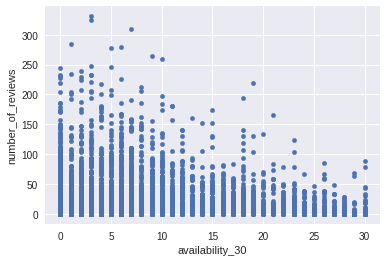

In [153]:
df_listing[df_listing.room_type=='Entire home/apt'].plot(kind='scatter',x='availability_30',y='number_of_reviews')

In [154]:
df_listing.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [155]:
df_reviews_eng = pd.merge(df_reviews_eng,df_listing[['id','review_scores_rating','review_scores_cleanliness','room_type','availability_30','availability_90','reviews_per_month']],left_on='listing_id',right_on='id')

In [156]:
df_reviews_eng.head()

,Unnamed: 0,listing_id,id_x,date,reviewer_id,reviewer_name,comments,language,id_y,review_scores_rating,review_scores_cleanliness,room_type,availability_30,availability_90,reviews_per_month
0,1,7878281,50115386,2015-10-09,45018962,Rotem,"AMAZING hosting, we arrived to Benita's appart...",en,7878281,99.0,10.0,Entire home/apt,6,6,0.69
1,3,7878281,58376102,2016-01-02,6789115,Nicola,"This apartment was beautiful, spacious, warm a...",en,7878281,99.0,10.0,Entire home/apt,6,6,0.69
2,4,7878281,71814574,2016-04-28,63494941,Claudio,BENITA AND KLEMENS WERE VERY KIND WITH US. THE...,en,7878281,99.0,10.0,Entire home/apt,6,6,0.69
3,5,7878281,74568125,2016-05-15,57750113,Sandeep,Yes. Klemens came with a bouquet of flowers an...,en,7878281,99.0,10.0,Entire home/apt,6,6,0.69
4,7,7878281,86698077,2016-07-17,19899121,Brian,Great experience. Hosts were responsive and fr...,en,7878281,99.0,10.0,Entire home/apt,6,6,0.69


In [157]:
groupy_per_lang = df_reviews.groupby('language').comments.count().sort_values(ascending = False)

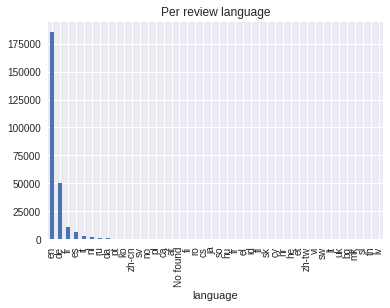

In [158]:
groupy_per_lang.plot.bar(title="Per review language")

In [159]:
def concat_comments(x):
    return "%s" % '- '.join(x)

df_reviews_eng = df_reviews_eng[df_reviews_eng.room_type=='Entire home/apt']
df_reviews_eng = df_reviews_eng[~df_reviews_eng.review_scores_rating.isnull()]
df_reviews_eng = df_reviews_eng[~df_reviews_eng.comments.str.contains('The host canceled this reservation')]
groupy = df_reviews_eng.groupby('listing_id').agg({'comments': [concat_comments,'count'], 'review_scores_rating': 'mean', 'availability_30':'mean','availability_90':'mean','reviews_per_month':'mean'})
#groupy  = df_rewiews_eng.groupby('listing_id')['comments','review_scores_cleanliness'].apply(lambda x: "%s" % ', '.join(x))
raw_text = groupy.comments.values
groupy.columns = ["_".join(x) for x in groupy.columns.ravel()]

groupy.head()

,availability_90_mean,reviews_per_month_mean,review_scores_rating_mean,availability_30_mean,comments_concat_comments,comments_count
listing_id,,,,,,
1971,90,0.21,96.0,30,great location and out look over the spree flu...,19
2015,44,5.04,90.0,7,Jan was very friendly and welcoming host! The ...,36
3176,51,1.49,92.0,0,"excellent stay, i would highly recommend it. a...",126
9991,17,0.09,100.0,4,The host was very welcoming and hospitable. He...,1
11203,10,0.17,100.0,3,He was a kind and polite gentleman.\r\n\r\nThe...,3


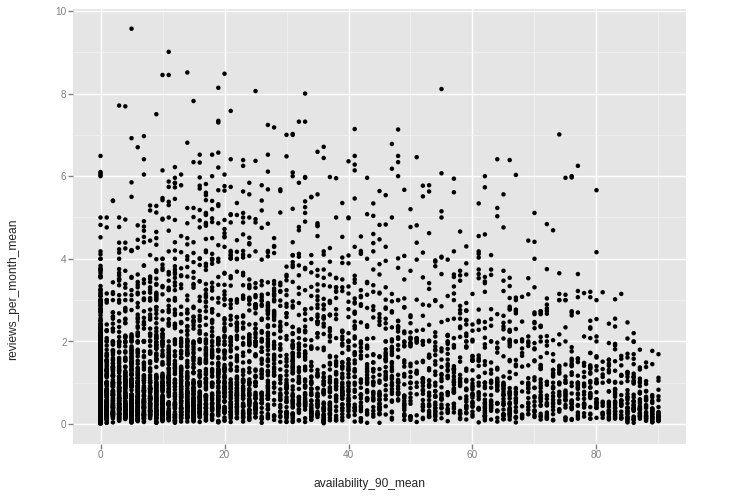

<ggplot: (8766373760221)>

In [161]:
ggplot(groupy,aes(x='availability_90_mean',y='reviews_per_month_mean'))+geom_point()

In [14]:
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')


def get_vectorized_text(X,ngram_range=(1,1),max_features=None):
    pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=ngram_range,tokenizer=tokenizer_porter,stop_words=stop,max_features=max_features)),
                         ('tfidf', TfidfTransformer())]) 
    return pipeline.fit_transform(X).todense()
vectorizer = TfidfVectorizer(ngram_range=(2,2),tokenizer=tokenizer_porter,stop_words=stop,max_features=3000)
X_vectorized = vectorizer.fit_transform(raw_text).todense()


pca = PCA(n_components=20).fit(X_vectorized)

print pca.explained_variance_ratio_.sum()
print pca.explained_variance_ratio_*100

[nltk_data] Downloading package stopwords to /home/ramon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0.0731067556506
[ 2.1933456   0.49886759  0.44706895  0.35358919  0.32974345  0.30783022
  0.29298695  0.27739501  0.26138207  0.25396692  0.23608609  0.23219624
  0.22279283  0.21552087  0.20908686  0.20371542  0.1995515   0.19509132
  0.19232913  0.18812934]


In [15]:
data2D = pca.transform(X_vectorized)
groupy['pc1']=data2D[:,0]
groupy['pc2']=data2D[:,1]

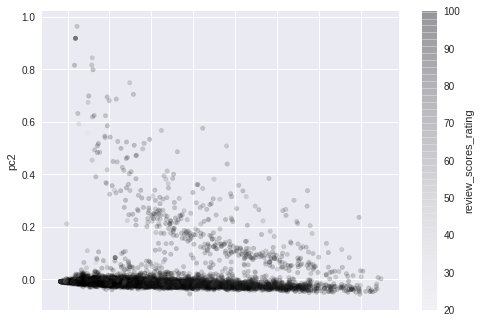

In [16]:
cmap = cm.get_cmap('Spectral')
data2D = pca.transform(X_vectorized)
groupy.plot(kind='scatter',x='pc1', y='pc2',c='review_scores_rating',alpha=.2)

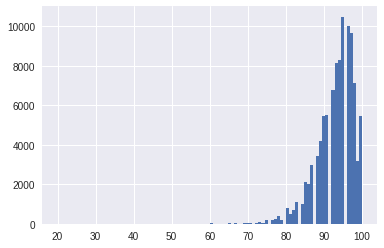

In [87]:
df_reviews_eng.review_scores_rating.hist(bins=100)

In [18]:
groupy['score_cat']=groupy.review_scores_rating.astype(str)
groupy['dirty']= groupy.comments.str.contains('dirty')*1.0

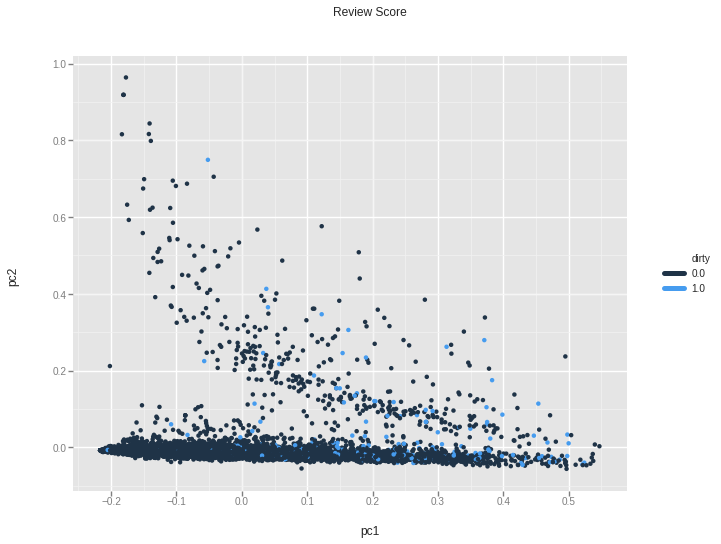

<ggplot: (8766362968661)>

In [19]:
ggplot(groupy, aes(x='pc1', y='pc2', color='dirty')) +\
    geom_point() +\
    xlab("pc1") + ylab("pc2") + ggtitle("Review Score")

In [22]:
count_vectorizer = TfidfVectorizer(ngram_range=(2,2),tokenizer=tokenizer_porter,stop_words=stop,max_features=3000)
counts = count_vectorizer.fit_transform(raw_text)

In [23]:
print raw_text.shape
print counts.shape
print groupy.shape

(7541,)
(7541, 3000)
(7541, 7)


### Add PCA 

In [24]:
pca = PCA(n_components=200).fit(counts.todense())

print pca.explained_variance_ratio_.sum()
print pca.explained_variance_ratio_*100
PC_matrix = pca.transform(X_vectorized)

0.2794231339
[ 2.1933456   0.49886771  0.44706913  0.35359256  0.32976124  0.30785496
  0.2930713   0.27753086  0.26179504  0.25432182  0.2367973   0.23302585
  0.22368746  0.21657805  0.21033225  0.20767371  0.20212396  0.19887287
  0.19675064  0.19557738  0.19152439  0.1897301   0.18744404  0.18635199
  0.18126376  0.18013788  0.17887984  0.17423819  0.17271346  0.17037261
  0.16959042  0.16838657  0.16604737  0.16574181  0.16210217  0.16138708
  0.15874853  0.15818486  0.15516979  0.15395736  0.15228086  0.15036311
  0.14980136  0.14868778  0.14718982  0.1468912   0.14507604  0.14452789
  0.14327511  0.14183768  0.14136213  0.1406181   0.1400436   0.13967126
  0.13848257  0.13735105  0.13723324  0.13689574  0.13586215  0.13489333
  0.13395663  0.13326086  0.13226093  0.1320381   0.13168315  0.13061584
  0.13006996  0.12918405  0.12849825  0.1283912   0.12777295  0.12655641
  0.12567918  0.12498797  0.12428661  0.1240438   0.12299986  0.12250451
  0.1223623   0.12061345  0.12025967  

In [25]:
type(PC_matrix)

numpy.ndarray

In [73]:
pc_columns = ["pc"+str(i) for i in range(1,201)]
df_PCA = pd.DataFrame(PC_matrix, columns=pc_columns)
df_PCA.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc191,pc192,pc193,pc194,pc195,pc196,pc197,pc198,pc199,pc200
0,0.098756,0.330983,0.014421,-0.011220,0.030049,-0.043753,0.014678,0.044417,0.010987,0.052487,...,-0.025825,0.016939,-0.019157,0.019050,-0.014932,-0.025776,-0.031319,-0.008777,-0.025469,-0.006135
1,0.117191,-0.008110,0.068679,0.001618,0.001853,-0.012747,0.003615,-0.038132,-0.031135,0.042563,...,-0.039636,-0.010472,-0.011596,0.003389,-0.004955,0.059340,0.017215,-0.022349,-0.013363,-0.032691
2,0.416281,-0.021058,-0.112367,0.126949,0.027143,0.010185,-0.088559,0.025589,-0.001853,-0.094142,...,-0.002720,-0.016854,0.020537,0.016734,0.011683,-0.036053,0.004465,0.005195,0.013190,-0.020047
3,-0.028821,-0.016328,0.022659,-0.011586,-0.096874,-0.065200,0.021170,-0.028045,-0.050761,0.000681,...,-0.038331,0.034771,-0.016990,-0.006696,-0.009357,-0.002412,-0.016404,-0.010528,0.003747,0.008417
4,-0.119607,-0.013967,0.092257,-0.043212,-0.071569,-0.033013,-0.020286,-0.017260,-0.048204,0.011680,...,0.030394,0.086656,-0.008640,-0.067257,-0.025669,0.045680,-0.010158,-0.015442,-0.069913,-0.097435


In [133]:
groupy_with_PCA = pd.concat([groupy.reset_index(),df_PCA],axis=1)

In [134]:
groupy.shape

(7541, 5)

In [41]:
df_PCA.shape

(7541, 200)

In [135]:
groupy_with_PCA

,listing_id,reviews_per_month_mean,review_scores_rating_mean,availability_30_mean,comments_concat_comments,comments_count,pc1,pc2,pc3,pc4,...,pc191,pc192,pc193,pc194,pc195,pc196,pc197,pc198,pc199,pc200
0,1971,0.21,96.0,30,great location and out look over the spree flu...,19,0.098756,0.330983,0.014421,-0.011220,...,-0.025825,0.016939,-0.019157,0.019050,-0.014932,-0.025776,-0.031319,-0.008777,-0.025469,-0.006135
1,2015,5.04,90.0,7,Jan was very friendly and welcoming host! The ...,36,0.117191,-0.008110,0.068679,0.001618,...,-0.039636,-0.010472,-0.011596,0.003389,-0.004955,0.059340,0.017215,-0.022349,-0.013363,-0.032691
2,3176,1.49,92.0,0,"excellent stay, i would highly recommend it. a...",126,0.416281,-0.021058,-0.112367,0.126949,...,-0.002720,-0.016854,0.020537,0.016734,0.011683,-0.036053,0.004465,0.005195,0.013190,-0.020047
3,9991,0.09,100.0,4,The host was very welcoming and hospitable. He...,1,-0.028821,-0.016328,0.022659,-0.011586,...,-0.038331,0.034771,-0.016990,-0.006696,-0.009357,-0.002412,-0.016404,-0.010528,0.003747,0.008417
4,11203,0.17,100.0,3,He was a kind and polite gentleman.\r\n\r\nThe...,3,-0.119607,-0.013967,0.092257,-0.043212,...,0.030394,0.086656,-0.008640,-0.067257,-0.025669,0.045680,-0.010158,-0.015442,-0.069913,-0.097435
5,16644,0.55,95.0,0,a great apartment in a fantastic area!\r\nwell...,36,0.310128,-0.037586,-0.058686,0.015512,...,0.047446,-0.003657,0.009262,-0.017925,0.044979,0.011624,-0.011164,-0.008430,0.031254,0.004367
6,17904,1.99,95.0,4,"It was a very calm, cute and warm studio, clos...",134,0.424584,-0.027711,-0.026773,-0.015467,...,-0.019048,-0.031306,-0.020649,0.004757,0.042080,-0.000004,-0.005971,-0.030321,-0.040648,-0.028556
7,20858,0.39,85.0,16,Two friends and I stayed in this lovely apartm...,18,-0.000986,0.005712,-0.005820,0.062367,...,0.010937,-0.017412,0.004184,0.000832,-0.002312,-0.008838,0.002677,-0.009439,0.008541,0.006322
8,21869,0.74,95.0,0,"Great room, very comfortable and in good locat...",57,0.298916,-0.026553,0.000211,0.019189,...,-0.007289,0.008397,-0.014534,0.009814,0.041516,0.006183,0.008573,-0.043506,0.011395,-0.001773
9,22415,0.27,96.0,9,we stayed 3 nights in Berlin. The flat was ni...,20,0.149949,-0.016748,-0.018648,0.005746,...,-0.042800,0.026237,-0.030807,-0.037304,-0.030675,-0.040840,0.007894,-0.022917,-0.038474,0.021889


In [162]:
groupy_with_PCA = groupy_with_PCA[groupy_with_PCA.availability_30_mean<30]
lm = LinearRegression()
rf = RandomForestClassifier()
X_train,X_test,y_train,y_test = train_test_split(groupy_with_PCA[pc_columns+['review_scores_rating_mean','comments_count','reviews_per_month_mean']].values,groupy_with_PCA.availability_30_mean,test_size=0.2)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [163]:
prediction= rf.predict(X_test)

In [164]:
print "R2:{}".format(r2_score(prediction,y_test))
print "RMSE :{}".format(np.sqrt(mean_squared_error(prediction,y_test)))

R2:-7.1698542596
RMSE :3.19229563874


In [165]:
df_prediction = pd.DataFrame({'observed':y_test,'predicted':prediction})

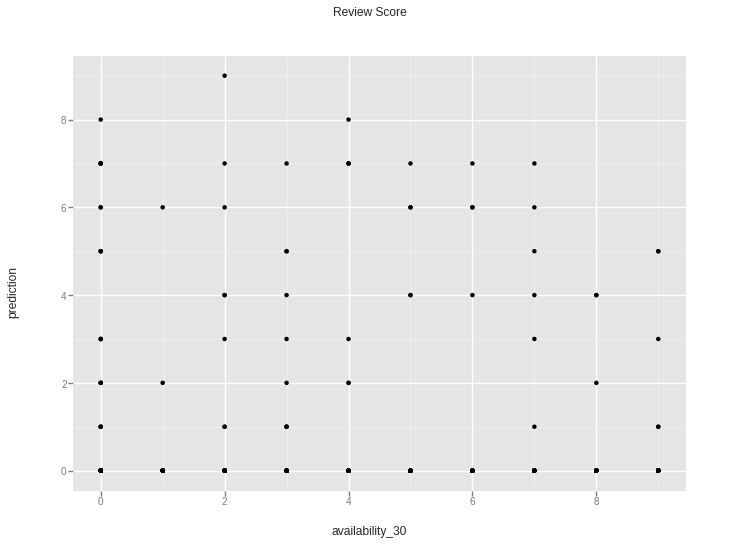

<ggplot: (8766373635353)>

In [166]:
ggplot(df_prediction, aes(x='observed', y='predicted')) +\
    geom_jitter() +\
    xlab("availability_30") + ylab("prediction") + ggtitle("Review Score")